In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [5]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.fillna(0,inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [12]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [13]:
df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],
                             df['pickup_latitude'],df['dropoff_latitude'])

df['Distance'] = df['Distance'].astype(float).round(2)

Text(0, 0.5, 'fare_amount')

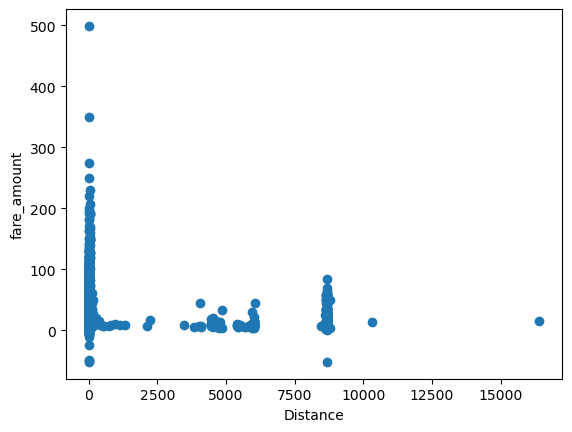

In [14]:
plt.scatter(df["Distance"],df["fare_amount"])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [15]:
df.drop(df[df['Distance'] > 60].index, inplace = True)
df.drop(df[df['Distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)

In [16]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193481 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         193481 non-null  int64  
 1   key                193481 non-null  object 
 2   fare_amount        193481 non-null  float64
 3   pickup_datetime    193481 non-null  object 
 4   pickup_longitude   193481 non-null  float64
 5   pickup_latitude    193481 non-null  float64
 6   dropoff_longitude  193481 non-null  float64
 7   dropoff_latitude   193481 non-null  float64
 8   passenger_count    193481 non-null  int64  
 9   Distance           193481 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 16.2+ MB


Text(0, 0.5, 'fare_amount')

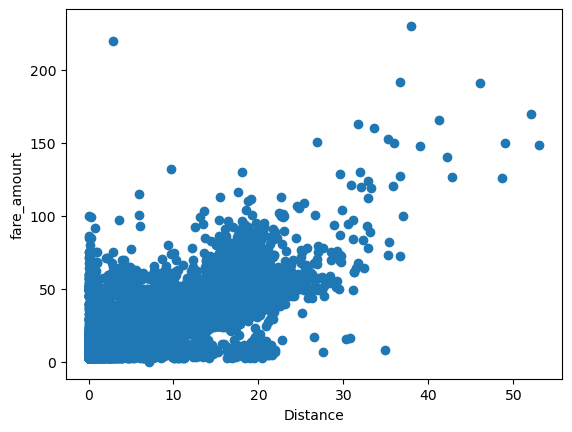

In [18]:
plt.scatter(df["Distance"],df["fare_amount"])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [19]:
corr=df.corr()

In [20]:
corr.style.background_gradient(cmap="BuGn")

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
Unnamed: 0,1.000000,0.000091,-0.000422,-0.000833,-0.000369,0.000215,0.002918,-0.000479
fare_amount,0.000091,1.000000,0.012070,-0.008682,0.010555,-0.008695,0.013508,0.893050
pickup_longitude,-0.000422,0.012070,1.000000,-0.949099,0.999883,-0.993975,0.009174,0.005337
pickup_latitude,-0.000833,-0.008682,-0.949099,1.000000,-0.949095,0.954759,-0.009219,0.003232
dropoff_longitude,-0.000369,0.010555,0.999883,-0.949095,1.000000,-0.993962,0.009168,0.004406
dropoff_latitude,0.000215,-0.008695,-0.993975,0.954759,-0.993962,1.000000,-0.009266,-0.002122
passenger_count,0.002918,0.013508,0.009174,-0.009219,0.009168,-0.009266,1.000000,0.007441
Distance,-0.000479,0.893050,0.005337,0.003232,0.004406,-0.002122,0.007441,1.000000


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
x=df["Distance"].values.reshape(-1,1)
y=df["fare_amount"].values.reshape(-1,1)

In [23]:
std= StandardScaler()

In [24]:
y_std=std.fit_transform(y)
print(y_std)

[[-0.4011162 ]
 [-0.38006651]
 [ 0.16722527]
 ...
 [ 2.06169682]
 [ 0.33562274]
 [ 0.29352337]]


In [25]:
x_std=std.fit_transform(x)
print(x_std)

[[-0.46599576]
 [-0.24929862]
 [ 0.46746884]
 ...
 [ 2.63721838]
 [ 0.05074357]
 [ 0.57303924]]


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y_std,test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = l_reg.predict(x_test)
df = {'Actual': y_test, 'Predicted': y_pred}

In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2417498757644449
Mean Absolute % Error: 3.2383171583226935
Mean Squared Error: 0.20233857274259331
Root Mean Squared Error: 0.4498206006205066


In [31]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(x_train, y_train)

C:\Users\Sumit Ranaware\AppData\Local\Temp\ipykernel_15936\3975641977.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [34]:
Y_pred = regressor.predict(x_test)
Y_pred

array([-0.29160463,  1.15032795, -0.36268007, ...,  2.04260747,
       -0.34570117, -0.40118613])

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.2417498757644449
Mean Absolute % Error: 3.2383171583226935
Mean Squared Error: 0.20233857274259331
Root Mean Squared Error: 0.4498206006205066
